# THE INTERN ACADEMY

### Task 4: Handwritten Digits Recognition

### By Nasir Khan

### Predict Handwritten Digits with MNIST Image Dataset

#### Dataset: This dataset is taken from [**Kaggle**](https://www.kaggle.com/dillsunnyb11/digit-recognizer/tasks)



**IMPORT REQUIRED LIBRARIES OR PACKAGES**

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

**LOAD TRAIN DATASET**

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
print("Now, We have successfully read datasets")

Now, We have successfully read datasets


In [3]:
train_df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Get the number of rows and columns:
print('Shape of Train Dataset',train_df.shape)
print('Shape of Test Dataset',test_df.shape)

Shape of Train Dataset (42000, 785)
Shape of Test Dataset (28000, 784)


In [6]:
def print_image(index):
    some_digit = train_df.iloc[index,1:].values
    some_digit_img = some_digit.reshape(28,28)
    plt.imshow(some_digit_img,'binary')

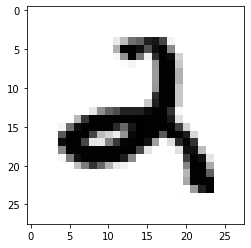

In [7]:
print_image(1900)

In [8]:
x = train_df.drop('label', axis=1)
print("Features shape: ", x.shape)
y = train_df.label
print("Target shape: ", y.shape)

Features shape:  (42000, 784)
Target shape:  (42000,)


**Checking First 5 Images**

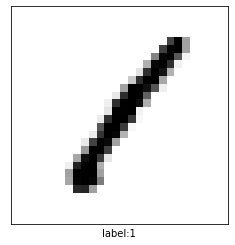

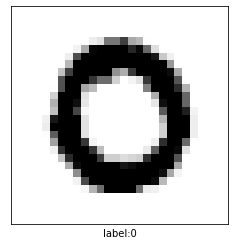

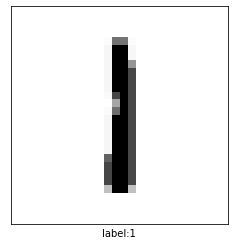

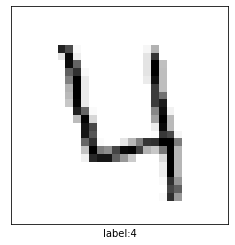

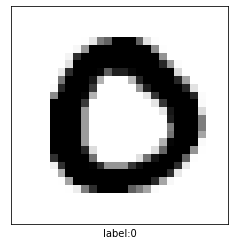

In [9]:
for i in range(5):
    #plt.subplot(5,4, i+1)
    plt.xticks([])
    plt.yticks([])
    print_image(i)
    plt.xlabel('label:{}'.format(y[i]))
    plt.show()

**Split Dataset Into Train & Test**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=42, test_size=0.2)

# TRAIN MODELS

## Logistic Regression

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

94.11

## K-Nearest Neighbors

In [12]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

98.2

## Naive Bayes

In [13]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

56.68

## Decision Tree

In [14]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

## Random Forest

In [15]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [16]:
def print_testimage(index):
    some_digit = test_df.iloc[index].values
    some_digit_img = some_digit.reshape(28,28)
    plt.imshow(some_digit_img,'binary')
    plt.axis("off")

In [17]:
model_1 = logreg.predict(test_df)
model_1

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [18]:
model_2 = knn.predict(test_df)
model_2

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [19]:
model_3 = decision_tree.predict(test_df)
model_3

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [20]:
model_4 = random_forest.predict(test_df)
model_4

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [21]:
model_5 = gaussian.predict(test_df)
model_5

array([0, 0, 9, ..., 8, 9, 0], dtype=int64)

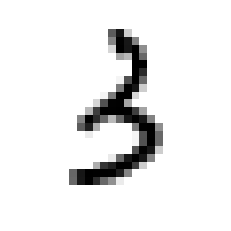

In [34]:
print_testimage(14000)

In [35]:
#Logistic Regression
model_1[14000]

3

In [36]:
#K-Nearest Neighbors
model_2[14000]

3

In [31]:
#Decision Tree
model_3[2000]

8

In [37]:
#Random Forest
model_4[14000]

3

In [38]:
#Naive Bayes
model_5[14000]

6

# MODEL  EVALUATION

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same.

In [39]:
models = pd.DataFrame({
    'Model': ['K-Nearest Neighbors', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,
              acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,100.00
4,Decision Tree,100.00
0,K-Nearest Neighbors,98.20
1,Logistic Regression,94.11
3,Naive Bayes,56.68


## CONCLUSION

Random Forest & Decision Tree Give The Highest Accuracy Among Models Evaluated So Far.

Naive Bayes Give The Lowest Accuracy